# Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading data from file

In [2]:
df = pd.read_csv('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Final_Data/Self_harm_modeling.csv', index_col=0)
df.head()

Sex       Race/Ethnicity Age Group  Year  Injuries  Population  Female  \
6     Male  White Non-Hispanice     00-04  2001         0     5862483       0   
7     Male                Black     00-04  2001         0     1585658       0   
8     Male             Hispanic     00-04  2001         0     1900490       0   
9     Male   Other Non-Hispanic     00-04  2001         0      518145       0   
11  Female  White Non-Hispanice     00-04  2001         0     5572690       1   

    Male  Black  Hispanic  ...  40-44  45-49  50-54  55-59  60-64  65-69  \
6      1      0         0  ...      0      0      0      0      0      0   
7      1      1         0  ...      0      0      0      0      0      0   
8      1      0         1  ...      0      0      0      0      0      0   
9      1      0         0  ...      0      0      0      0      0      0   
11     0      0         0  ...      0      0      0      0      0      0   

    70-74  75-79  80-84  85+  
6       0      0      0    0  
7       0      0      0    0  
8       0      0      0    0  
9       0      0      0    0  
11      0      0      0    0  

[5 rows x 30 columns]

# Dropping unwanted columns

In [3]:
y = df['Injuries']
df1 = df.drop(['Sex', 'Race/Ethnicity', 'Age Group', 'Injuries'], axis=1)

In [4]:
df1.head()

Year  Population  Female  Male  Black  Hispanic  Other Non-Hispanic  \
6   2001     5862483       0     1      0         0                   0   
7   2001     1585658       0     1      1         0                   0   
8   2001     1900490       0     1      0         1                   0   
9   2001      518145       0     1      0         0                   1   
11  2001     5572690       1     0      0         0                   0   

    White Non-Hispanice  00-04  05-09  ...  40-44  45-49  50-54  55-59  60-64  \
6                     1      1      0  ...      0      0      0      0      0   
7                     0      1      0  ...      0      0      0      0      0   
8                     0      1      0  ...      0      0      0      0      0   
9                     0      1      0  ...      0      0      0      0      0   
11                    1      1      0  ...      0      0      0      0      0   

    65-69  70-74  75-79  80-84  85+  
6       0      0      0      0    0  
7       0      0      0      0    0  
8       0      0      0      0    0  
9       0      0      0      0    0  
11      0      0      0      0    0  

[5 rows x 26 columns]

# Splitting dataset into train and split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.75)

# Importing random forest classifier and training model

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators = 100)  
  
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

# Exporting tree as dot file

In [7]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(rfc_model.estimators_[0], 
                out_file='tree.dot', 
                feature_names = df1.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Visualizing tree

Now, lets visualize the tree. The dot file is converted to png using an online converter. After we export the tree as dot file we have tree.dot file in the directory. We just convert it and open.

In [8]:
from IPython.display import Image
Image(filename = 'tree.png')

# Calculating model accuracy

In [9]:
from sklearn import metrics  

y_pred = rfc_model.predict(X_test)    
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7598784194528876


# Importing linear regression and training model

In [10]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
accuracy = lr_model.score(X_test,y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.593364911648583


# Predicting on test dataset

In [12]:
y_pred = lr_model.predict(X_test)

In [13]:
y_test = list(map(float, y_test))

In [14]:
print(len(X_train))

657


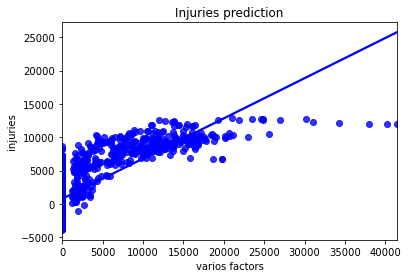

In [15]:
import seaborn as sns
graph = sns.regplot(x=y_test, y=y_pred, ci=None, color="b")
graph.set(xlabel ="varios factors", ylabel = "injuries", title = 'Injuries prediction')
plt.show()

# Calculating rmse

In [16]:
from sklearn import metrics
import math

print("Root mean squared error: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean squared error:  3039.8889020140928


Here we can see that rmse for linear regression model is very high. This is because many values are zero and there is very less linear correlation. In the future work we might want to eliminate these zero values to see better linear correlation. Thus we use random forest classifier

In [17]:
importance = rfc_model.feature_importances_
labels = df1.columns

In [18]:
feature_imp = pd.Series(importance, index = labels).sort_values(ascending = False)
feature_imp

Population             0.398969
Year                   0.193997
White Non-Hispanice    0.039569
20-24                  0.038463
15-19                  0.033208
Male                   0.031877
Female                 0.031689
Black                  0.023017
Other Non-Hispanic     0.023014
Hispanic               0.022906
25-29                  0.020201
30-34                  0.018921
40-44                  0.018529
35-39                  0.017858
10-14                  0.017129
55-59                  0.012665
50-54                  0.012199
45-49                  0.009789
65-69                  0.008298
60-64                  0.006911
05-09                  0.006308
00-04                  0.006119
80-84                  0.002645
75-79                  0.001965
70-74                  0.001951
85+                    0.001801
dtype: float64

From the above values and below diagram we can see that population and year have the the highest degree of importance on injuries. Following, we see that the White Non-Hispanice people are more likely to commit self harm followed by people who ages between   15-19 and 20-24. 

Now, Let's visualize these results now.


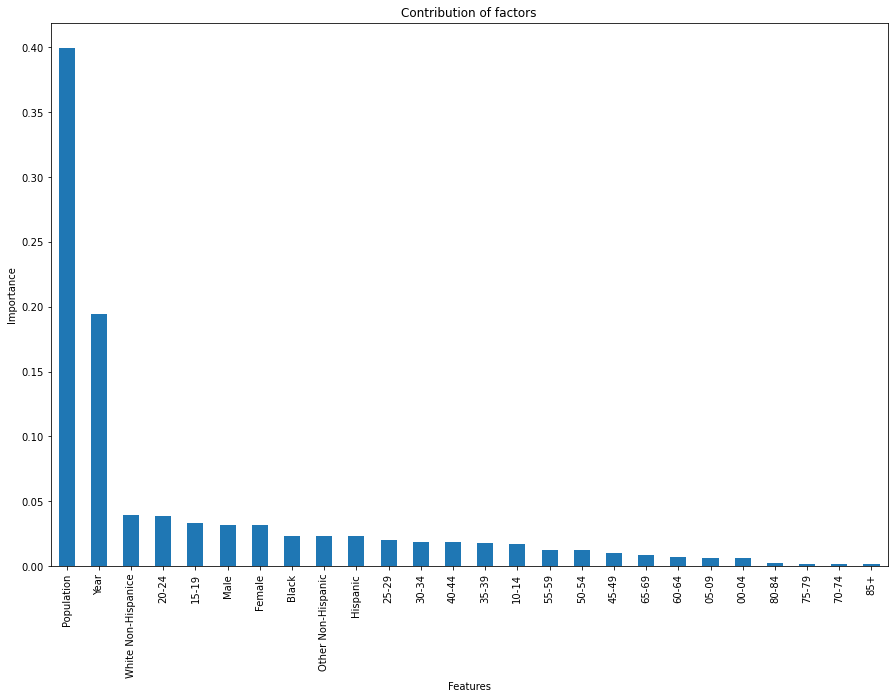

In [19]:
plot = feature_imp.plot.bar(figsize=(15, 10))
plot.set(title ='Contribution of factors', xlabel ="Features", ylabel = "Importance" )
plt.show()
